In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

FigureCanvasNbAgg()

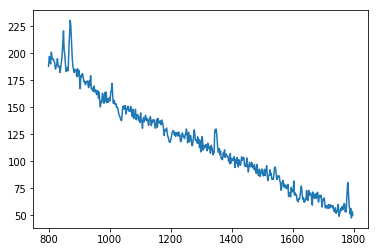

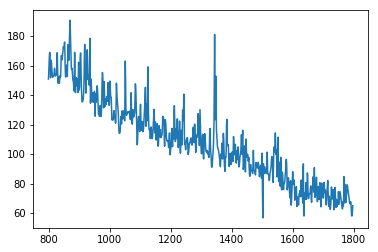

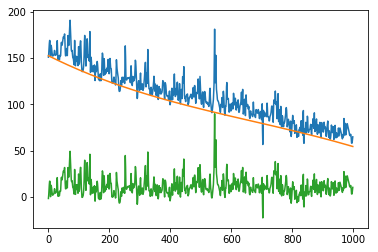

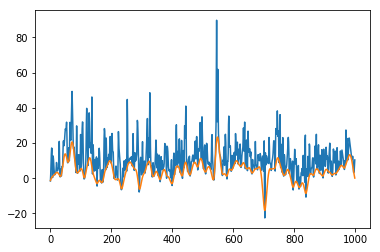

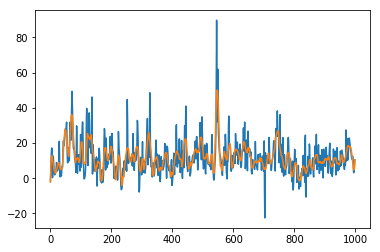

In [7]:
%run Preprocessing.ipynb

### Support Vector Machines

In [8]:
clf_svm = svm.SVC(gamma='scale')
clf_svm.fit(X_train, y_train);

In [9]:
pred_holdout_svm = clf_svm.predict(X_holdout)
svm_accuracy = accuracy_score(y_holdout, pred_holdout_svm)
svm_accuracy

0.5

In [10]:
parameter_candidates = [
  {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 'kernel': ['linear']},
  {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [11]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=clf_svm, param_grid=parameter_candidates, n_jobs=-1, cv=5)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)  

/home/andrey/anaconda3/envs/env36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                          'kernel': ['linear']},
                         {'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
clf.best_score_

0.7857142857142857

In [13]:
clf.best_estimator_

SVC(C=1e-05, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
clf.score(X_holdout, y_holdout)

0.6666666666666666

In [15]:
pred_holdout_svm = clf.best_estimator_.predict(X_holdout)
svm_accuracy = accuracy_score(y_holdout, pred_holdout_svm)
svm_accuracy

0.6666666666666666